<img src="https://cdn3.dualshockers.com/wp-content/uploads/2015/11/Tom-Clancys-Rainbow-Six-Siege.jpg" alt="Drawing" style="width: 700px;"/>
<center>
<h1 style="font-size:36px;">Analyzing Rainbow Six Siege</h1>
<h4>
Charles Liu, Jules Iglesia</h4>
<hr>
<h1>Introduction</h1>
</center>
<body><p>
Rainbow Six Siege (R6S) is a MMORTG (Massively Multiplayer Online Real Time Strategy) first-person shooter game developed by Ubisoft. Released in December 2015, Siege only recently gained popularity and boasts 2.3 million players daily with over 25 million registered users. The premise of the game is simple: each game consists of two teams of 5 players, with one team labeled as the Attackers and one as the Defenders. Attackers are assigned a goal depending on the game mode, which ranges from extracting a hostage from a building or planting/detonating a bomb in a building. Each game consists of best of 5 or 7 rounds, with each round ending if the Attackers objective is completed within a timeframe, time runs out, or all members of one side are eliminated. Players currently can choose from 68 maps, 36 unique operators, and what loadouts (primary weapon, secondary weapon, etc.) to use. *Full details can be found <a href="https://rainbow6.ubisoft.com/siege/en-us/game-info/index.aspx">here</a>. 
<p>
On June 27, 2017, a Game Intelligence Analyst on the Ubisoft R6S Development Team released datasets covering various metrics from in-game data. Along with this <a href="https://rainbow6.ubisoft.com/siege/en-us/news/152-293696-16/introduction-to-the-data-peek-velvet-shell-statistics">data release</a>, he revealed that analysts at Ubisoft work with several different teams and play an important role in the overall development of the game. Given the interesting statistics they were able to find, the Development Team decided to release some in-game data as a way to allow members of the community to conduct some of their own data analyses.
<p> 
In this tutorial, our goal is to tidy the in-game data given to us, provide valuable insight into which operators/loadouts are the most successful in terms of win rate/kill-death ratio, and predict these win/kill-death ratios when a certain character and loadout are chosen in different situations. For readers unfamiliar with this game, we hope this analyses will make them interested in trying out Rainbow Six Siege and provide some evidence on which operators are best to pick starting out as a new player. For experienced players, we hope to show interesting unknown statistics and maybe even give them new things to try when they play. 
<hr>
<center><h1>Getting Started with the Data</h1></center>
<body><p>
We make use of Python 3 along with a few imported libraries: <a href="https://pandas.pydata.org/pandas-docs/stable/">pandas</a>, <a href="https://docs.scipy.org/doc/numpy/user/">numpy</a>, <a href="https://matplotlib.org/contents.html">matplotlib</a>, <a href="http://scikit-learn.org/stable/documentation.html">scikit-learn</a>, <a href="https://seaborn.pydata.org/">seaborn</a>, and more. 
</body>


In [20]:
# Necessary libraries and imports to complete this tutorial
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn import feature_selection
from sklearn.preprocessing import PolynomialFeatures
import seaborn as sns
import sklearn
from sklearn import preprocessing
import warnings
warnings.filterwarnings('ignore')

<body>
The two datasets we will be using are found at the bottom of the <a href="https://rainbow6.ubisoft.com/siege/en-us/news/152-293696-16/introduction-to-the-data-peek-velvet-shell-statistics">data release</a> mentioned earlier (Operator Loadouts Data and Objectives Data). Each dataset comes in the form of a CSV (Comma Separated Value) file.
<h2>Preprocessing the Data</h2>
<p>
Before running the code to read in the Objectives file, we had to preprocess the data using Excel and any text editor. The Objectives dataset was huge, so to have a more manageably sized dataframe we grabbed approximately the first million lines and verified the platform was PC for each entry. Additionally, when we tried to initially read in the downloaded Objectives CSV, pandas raised errors and had issues with the 'ñ' character present in every row in the "gamemode" column, so we changed every instance of 'ñ' to '.' with a text editor. On the other hand, the Operators dataset was fine.
<p>
You could do this yourself, but we have already gone ahead and modified it for you. The ZIP file for both datasets can be found <a href="https://github.com/jiglesia3/jiglesia3.github.io/blob/master/datasets.zip">here</a>. Now we read in both CSV files using Pandas, with the ';' separator.
</body>

<h2> Reading the Data </h2>

In [21]:
operators = pd.read_csv("S5_operators.csv", sep=';')
objectives = pd.read_csv("S5_objectives.csv", sep=';')
operators.head()

,platform,dateid,skillrank,role,operator,primaryweapon,secondaryweapon,secondarygadget,nbwins,nbkills,nbdeaths,nbpicks
0,PC,20170210,Bronze,Attacker,BOPE-CAPITAO,M249,PRB92,CLAYMORE,6,6,6,8
1,PC,20170210,Bronze,Attacker,BOPE-CAPITAO,M249,PRB92,STUN GRENADE,4,2,6,8
2,PC,20170210,Bronze,Attacker,BOPE-CAPITAO,PARA-308,PRB92,CLAYMORE,37,40,49,70
3,PC,20170210,Bronze,Attacker,BOPE-CAPITAO,PARA-308,PRB92,STUN GRENADE,17,24,31,41
4,PC,20170210,Bronze,Attacker,G.E.O.-JACKAL,C7E,ITA12S,BREACH CHARGE,74,123,127,174


In the above Operators dataset, there are 12 columns. We have: 

* Platform  (PC, PS4, or Xbox One) 
* Dateid
* <a href = "http://rainbowsix.wikia.com/wiki/Ranked">Skill Rank</a> (Copper, Bronze, Silver, Gold, Platinum, Diamond)
* Role (Attacker or Defender)
* <a href="https://rainbow6.ubisoft.com/siege/en-us/game-info/operators.aspx">Operator</a> (unique character chosen by players at the start of each round)
* <a href="http://rainbowsix.wikia.com/wiki/Category:Weapons_of_Tom_Clancy%27s_Rainbow_Six_Siege">Weapon Loadout</a> (primary, secondary, gadget)
* Number of wins, kills, deaths, picks
   
The titles of each column should be self explanatory. If you'd like to learn more about a column in the context of the game, important topics have links to additional information.

In [22]:
objectives.head()

,platform,dateid,gamemode,mapname,objectivelocation,skillrank,role,operator,nbwins,nbkills,nbdeaths,nbpicks
0,PC,20170210,PvP . BOMB,BANK,EXECUTIVE LOUNGE / CEO OFFICE,Bronze,Attacker,G.E.O.-JACKAL,0,0,1,1
1,PC,20170210,PvP . BOMB,BANK,EXECUTIVE LOUNGE / CEO OFFICE,Bronze,Attacker,GIGN-MONTAGNE,1,0,2,3
2,PC,20170210,PvP . BOMB,BANK,EXECUTIVE LOUNGE / CEO OFFICE,Bronze,Attacker,GSG9-IQ,0,0,1,1
3,PC,20170210,PvP . BOMB,BANK,EXECUTIVE LOUNGE / CEO OFFICE,Bronze,Attacker,JTF2-BUCK,0,0,1,1
4,PC,20170210,PvP . BOMB,BANK,EXECUTIVE LOUNGE / CEO OFFICE,Bronze,Attacker,SAS-THATCHER,0,0,1,1


In the above Objectives dataset, there are 12 columns. We have: 

* Platform  (PC, PS4, or Xbox One) 
* Dateid
* <a href = "https://rainbow6.ubisoft.com/siege/en-us/game-info/game-mode.aspx">Gamemode</a> (for PvP: Hostage, Secure Area, Bomb) 
* <a href="https://rainbow6.ubisoft.com/siege/en-us/game-info/maps.aspx">Map Name</a>
* Objective location (for Defenders to protect)
* <a href = "http://rainbowsix.wikia.com/wiki/Ranked">Skill Rank</a> (Copper, Bronze, Silver, Gold, Platinum, Diamond)
* Role (Attacker or Defender)
* <a href="https://rainbow6.ubisoft.com/siege/en-us/game-info/operators.aspx">Operator</a> (unique character chosen by players at the start of each round)
* Number of wins, kills, deaths, picks
   
The titles of each column should be self explanatory. If you'd like to learn more about a column in the context of the game, important topics have links to additional information.

<h2> Tidying and Modifying the Data </h2>
<p>
As PC players, we we want to only look at data with PC (no PS4 or Xbox One) as the platform. We have manually already done this with the Objectives dataset, now we just have to filter through the Operators dataset. Once that's been done, we will remove the platform column because all our data only involves the PC platform. 
<p>
We will remove the 'dateid', 'primaryweapon', 'secondaryweapon', and 'secondarygadget' columns because it's a little too complicated for the purpose of this tutorial. There are too many different weapon loadouts, and in this tutorial we mainly want to focus on how operators are chosen differently across rank in the upcoming analysis. Dateid will be removed too because the time it spans is too short (only 3 months) and the Objectives dataset spans a different timeframe.
<p>
Then, we're going to collapse rows in the dataframe, grouping data by 'skillrank', 'role', and 'operator', and summing 'nbwins', 'nbkills', 'nbdeaths', and 'nbpicks' for each group. Also just wanted to note that there is a default character in the game, which is seen in the dataset as "RESERVE." There are multiple types of default characters (reserves) that have different stats and loadouts, as denoted by the prefix.

In [23]:
# Using only PC platform rows, then deleting dateid, platform, primaryweapon, secondaryweapon, and gadget columns
operators = operators.loc[operators['platform'] == ('PC')]
operators.drop(['dateid','platform','primaryweapon','secondaryweapon','secondarygadget'], axis=1, inplace=True)

# Group: skillrank, role, and operator
# Sum up rounds won, kills, deaths, and rounds played across all ranks for each group
operators = operators.groupby(['skillrank','role', 'operator'], as_index=False)['nbwins', 'nbkills', 'nbdeaths', 'nbpicks'].sum()
operators.head()

,skillrank,role,operator,nbwins,nbkills,nbdeaths,nbpicks
0,Bronze,Attacker,BOPE-CAPITAO,7131,9507,11290,15383
1,Bronze,Attacker,G.E.O.-JACKAL,21358,32434,32760,45492
2,Bronze,Attacker,GIGN-MONTAGNE,12175,9773,19389,26981
3,Bronze,Attacker,GIGN-RESERVE,377,432,701,946
4,Bronze,Attacker,GIGN-TWITCH,25733,35115,36318,53941


<body>
Moving on to modifying the Objectives dataframe, we will start with noticing that all types under the "gamemode" column are preceded by 'PvP . '. All rows in the data are PvP anyway, so we will remove this prefix. As proof, here's a small code snippet to show all different gamemodes currently contained in the objectives dataframe.
</body>

In [24]:
print(objectives['gamemode'].unique())

['PvP . BOMB' 'PvP . HOSTAGE' 'PvP . SECURE AREA']


We can remove the 'PvP . ' prefix using Pandas.Series.replace as shown below. 

In [25]:
# Grabbing all values under the column gamemode
gamemodes = objectives['gamemode']

# Using replace to remove the prefix
gamemodes.replace(to_replace='PvP . ', value='', regex=True, inplace=True)
objectives['gamemode'] = gamemodes
print(objectives['gamemode'].unique())

['BOMB' 'HOSTAGE' 'SECURE AREA']


Now, we will remove the 'dateid', 'platform', and objectivelocation columns. Objective location is similar to the weapon loadouts in the Operators data, in that it over complicated things a bit. At the beginning of each round, objectives can spawn in different and multiple places within a map. To make things simpler, this will be removed, and only data within each map will be analyzed later. Again we will collapse rows in the dataframe, grouping by 'gamemode', 'mapname', 'role', and 'operator', and summing 'nbwins', 'nbkills', 'nbdeaths', and 'nbpicks' for each group.

In [26]:
# Deleting dateid, objectivelocation, and platform columns
objectives.drop(['dateid','platform','objectivelocation'], axis=1, inplace=True)

# Group: gamemode, mapname, skillname, role, and operator
# Sum up rounds won, kills, deaths, and rounds played across all ranks for each group
objectives = objectives.groupby(['gamemode', 'mapname', 'skillrank', 'role', 'operator'], \
                                        as_index=False)['nbwins', 'nbkills', 'nbdeaths', 'nbpicks'].sum()
objectives.head()

,gamemode,mapname,skillrank,role,operator,nbwins,nbkills,nbdeaths,nbpicks
0,BOMB,BANK,Bronze,Attacker,BOPE-CAPITAO,58,78,96,126
1,BOMB,BANK,Bronze,Attacker,G.E.O.-JACKAL,152,286,249,354
2,BOMB,BANK,Bronze,Attacker,GIGN-MONTAGNE,69,55,133,174
3,BOMB,BANK,Bronze,Attacker,GIGN-RESERVE,2,3,8,10
4,BOMB,BANK,Bronze,Attacker,GIGN-TWITCH,160,214,256,377


Perfect! Now that we've set up and simplified our data, it's time to investigate and perform analysis on the two datasets we have. 

<center>
<h3>Map: Chalet</h3>
<img src="https://ubistatic19-a.akamaihd.net/resource/en-us/game/rainbow6/siege/r6-game-info-map-chalet-01_227824.jpg" alt="Drawing" style="width: 700px;"/>
</center>

<hr>
<center><h1>Exploratory Data Analysis</h1></center>

For this section, there's not enough distinct, default colors for the graphs we will use. Thankfully, seaborn allows us to create a new palette of colors to use for graphing. Below is a set of distinct colors, and of course you can change whatever colors you like.

In [27]:
colors = ["purple", "green", "blue", "pink", "brown", "red", "teal", "orange", "yellow", "grey", \
          "cyan", "bright green", "hot pink", "black", "maroon", "tan", "lavender", "goldenrod", "sky blue", "olive"]
new_palette = sns.xkcd_palette(colors)

<h2> Graphing Kill-Death and Win Ratio </h2>
* Only Operators dataset is used

The kill-death and win ratios aren't calculated for us, so we will also need to add these two columns to the Operators dataframe. In the context of this game, kill-death and win ratios are more significant because both show averages per game as opposed to just the total number of kills or deaths. We will calculate both using two simple formulas:
<p>
k/d ratio = $\frac{nbkills}{nbdeaths}$
<p>
win ratio = $\frac{nbwins}{nbpicks}$
<p>
We will make a new dataframe (grouping by operator and role), sum the number of kills, deaths, wins, and picks, calculate kill-death and win ratios for each operator group, then show the relationship (if any) between k/d and win ratio.

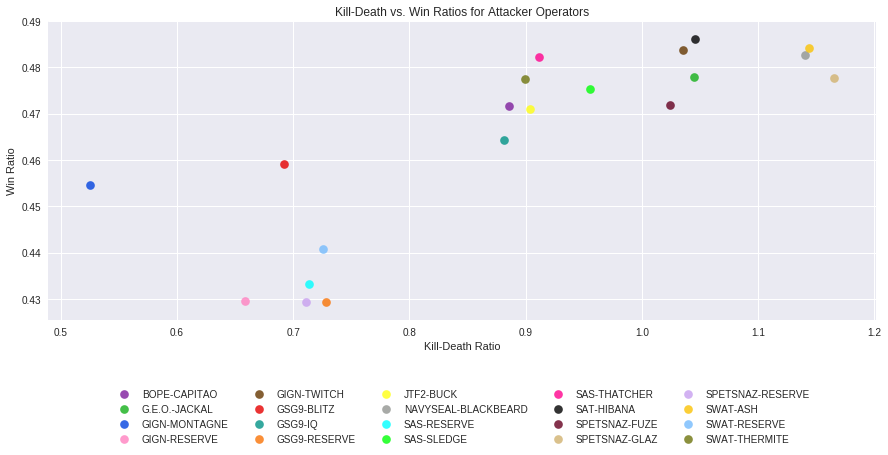

In [29]:
# Grouping by role and operator, disregarding skillrank
operator_groups = operators.groupby(['role', 'operator'], as_index=False)['nbwins', 'nbkills', 'nbdeaths', 'nbpicks'].sum()

# Adding k/d and win ratio columns
operator_groups['k/d_ratio'] = pd.to_numeric(operator_groups['nbkills']) / pd.to_numeric(operator_groups['nbdeaths'])
operator_groups['win_ratio'] = pd.to_numeric(operator_groups['nbwins']) / pd.to_numeric(operator_groups['nbpicks'])

# Getting only Attacker operators
operators_att = operator_groups.loc[operator_groups['role'] == ('Attacker')]

# Graphing
sns.lmplot(x="k/d_ratio", y="win_ratio", data=operators_att, fit_reg=False, hue='operator', \
           legend=False, palette=new_palette, size=5, aspect=2.5, scatter_kws={"s": 75})
plt.legend(loc=9, bbox_to_anchor=(0.5, -0.2), ncol=5)
plt.title('Kill-Death vs. Win Ratios for Attacker Operators')
plt.xlabel('Kill-Death Ratio')
plt.ylabel('Win Ratio')
sns.plt.show()

# Talk about graph above

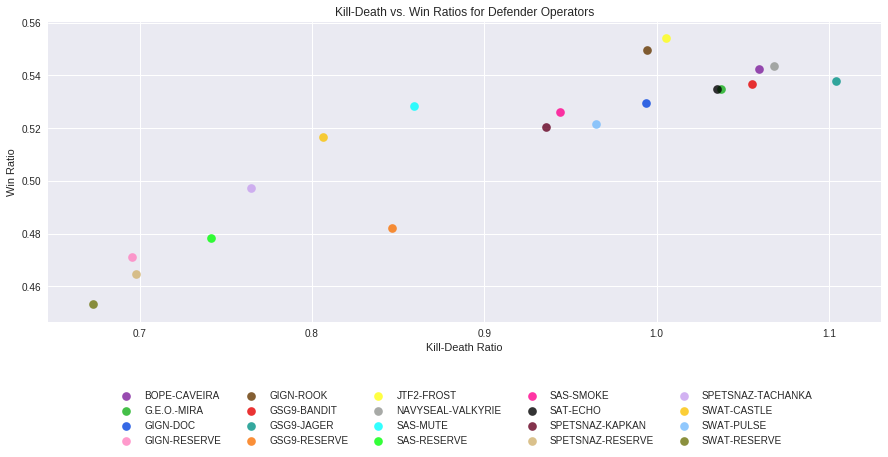

In [32]:
# Getting only Defener operators
operators_def = operator_groups.loc[operator_groups['role'] == ('Defender')]

# Graphing
sns.lmplot(x="k/d_ratio", y="win_ratio", data=operators_def, fit_reg=False, hue='operator', legend=False, palette=new_palette, size=5, aspect=2.5, scatter_kws={"s": 75})
plt.legend(loc=9, bbox_to_anchor=(0.5, -0.2), ncol=5)
plt.title('Kill-Death vs. Win Ratios for Defender Operators')
plt.xlabel('Kill-Death Ratio')
plt.ylabel('Win Ratio')
sns.plt.show()

# Talk about graph above

<h2> Graphing by Rank </h2>
* Only Operators dataset is used

We've already shown how operators in general perform differently based on kill-death and win ratio. Now let's investigate how the picks differ across the ranks. We will start with the original simplified dataframe again. Grouping by skillrank, role, and operator, we can sum up the number of wins, kills, deaths, and picks for each group.  

In [43]:
# Create dataframe to sum up rounds won, kills, deaths, and rounds played across all ranks for each rank, role, and operator
ops_by_rank = operators.groupby(['skillrank', 'role', 'operator'], \
                                        as_index=False)['nbwins', 'nbkills', 'nbdeaths', 'nbpicks'].sum()

ops_by_rank.head()

,skillrank,role,operator,nbwins,nbkills,nbdeaths,nbpicks
0,Bronze,Attacker,BOPE-CAPITAO,7131,9507,11290,15383
1,Bronze,Attacker,G.E.O.-JACKAL,21358,32434,32760,45492
2,Bronze,Attacker,GIGN-MONTAGNE,12175,9773,19389,26981
3,Bronze,Attacker,GIGN-RESERVE,377,432,701,946
4,Bronze,Attacker,GIGN-TWITCH,25733,35115,36318,53941


A common question when performing data analysis is whether or not standardization is necessary. Lets take a look at the distribution of data within the operators dataset. The total number of picks based on rank should suffice as a valid metric to check how the data is distributed for Attackers and Defenders. Essentially, total number of picks is equal to the number of players in each rank. Only one player can pick one character per round.

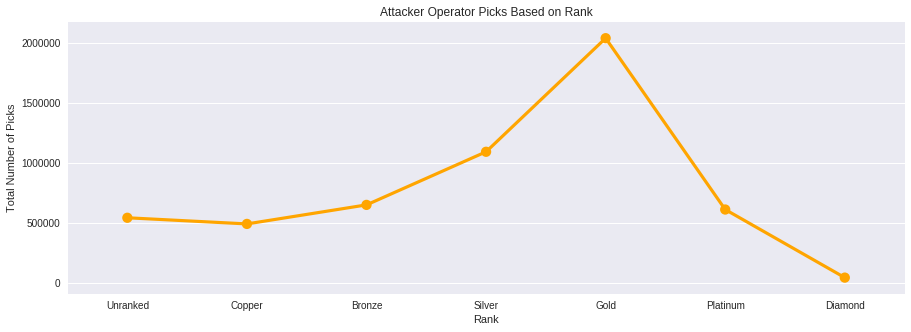

In [56]:
# Group: rank and role
# Summing the number of wins, kills, deaths, and picks for each group
total_ops_by_rank = operators.groupby(['skillrank', 'role'], \
                                        as_index=False)['nbwins', 'nbkills', 'nbdeaths', 'nbpicks'].sum()

# Only Attacker rows
total_ops_by_rank_att = total_ops_by_rank.loc[total_ops_by_rank['role'] == ('Attacker')]

# Order is used to determine categorical variables for the x-axis
order = ['Unranked','Copper','Bronze','Silver','Gold','Platinum','Diamond']

# Graphing
plt.figure(figsize=(15,5))
sns.pointplot(x="skillrank", y="nbpicks", data=total_ops_by_rank_att, legend=True, \
              color='orange', size=5, aspect=2.5, order=order)
plt.legend(loc=9, bbox_to_anchor=(0.5, -0.2), ncol=5)
plt.title('Attacker Operator Picks Based on Rank')
plt.xlabel('Rank')
plt.ylabel('Total Number of Picks')
sns.plt.show()

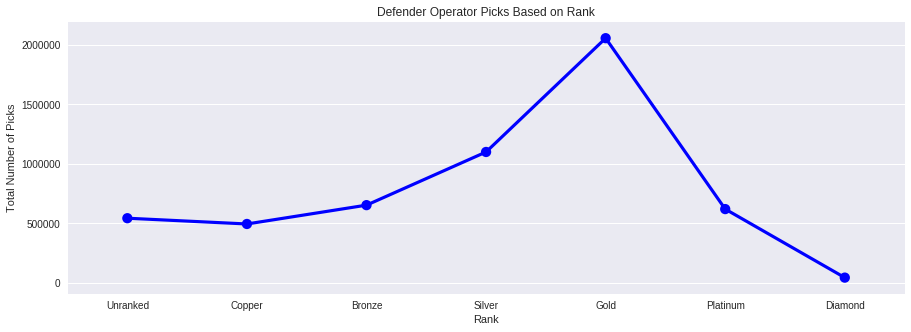

In [61]:
# Only Defender rows
total_ops_by_rank_def = total_ops_by_rank.loc[total_ops_by_rank['role'] == ('Defender')]

# Order is used to determine categorical variables for the x-axis
order = ['Unranked','Copper','Bronze','Silver','Gold','Platinum','Diamond']

# Graphing
plt.figure(figsize=(15,5))
sns.pointplot(x="skillrank", y="nbpicks", data=total_ops_by_rank_def, legend=True, \
              color='blue', size=5, aspect=2.5, order=order)
plt.legend(loc=9, bbox_to_anchor=(0.5, -0.2), ncol=5)
plt.title('Defender Operator Picks Based on Rank')
plt.xlabel('Rank')
plt.ylabel('Total Number of Picks')
sns.plt.show()

First just wanted to note that the graphs for each role look the same, and that's because they are. They should be the same because for every picked Attacker operator, there will always be a picked Defender operator. Sometimes uneven teams may occur, but in ranked this rarely happens.
<p>
From both graphs, we see that standardization is quite necessary in the data. There's alot more picks for each operator across both roles in Silver and Gold, while Diamond has the fewest amount of picks. As players ourselves, we know that this happens because most players are in Silver and Gold, while only a small group of elite players are in Diamond. To standardize we will use the preprocessing library from scikit learn. 

In [89]:
frames =  []
sd_ops_by_rank = ops_by_rank.groupby(['skillrank','role'], as_index=False)

for group, tbl in sd_ops_by_rank:
        tbl['scaled_nbpicks'] = preprocessing.scale(tbl['nbpicks'])
        frames.append(tbl)
sd_ops_by_rank = pd.concat(frames)
sd_ops_by_rank.head()

,skillrank,role,operator,nbwins,nbkills,nbdeaths,nbpicks,scaled_nbpicks
0,Bronze,Attacker,BOPE-CAPITAO,7131,9507,11290,15383,-0.712957
1,Bronze,Attacker,G.E.O.-JACKAL,21358,32434,32760,45492,0.543624
2,Bronze,Attacker,GIGN-MONTAGNE,12175,9773,19389,26981,-0.228922
3,Bronze,Attacker,GIGN-RESERVE,377,432,701,946,-1.315477
4,Bronze,Attacker,GIGN-TWITCH,25733,35115,36318,53941,0.896238


Now that the number of picks for each operator are standardized (within their respective ranks), we can graph the results.

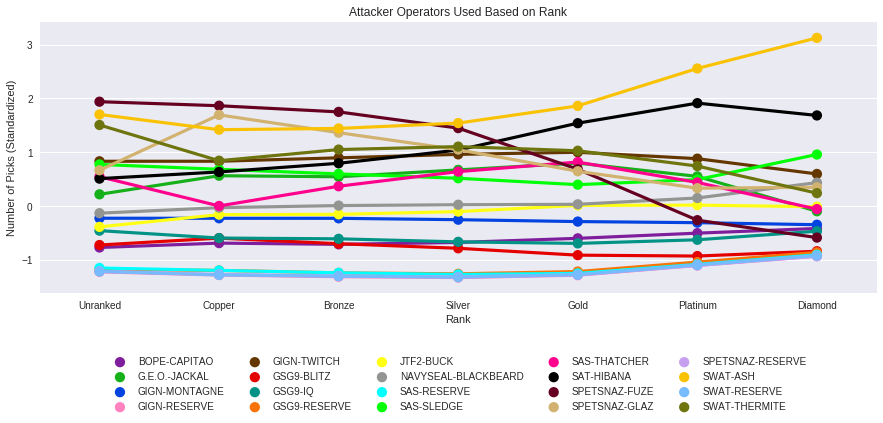

In [90]:
# Order is used to determine categorical variables for the x-axis
order = ['Unranked','Copper','Bronze','Silver','Gold','Platinum','Diamond']

# Only Attacker operators
ops_by_rank_att = sd_ops_by_rank.loc[sd_ops_by_rank['role'] == ('Attacker')]

# Graphing
plt.figure(figsize=(15,5))
sns.pointplot(x="skillrank", y="scaled_nbpicks", hue="operator", data=ops_by_rank_att, legend=False, palette=new_palette, size=5, aspect=2.5, order=order);
plt.legend(loc=9, bbox_to_anchor=(0.5, -0.2), ncol=5)
plt.title('Attacker Operators Used Based on Rank')
plt.xlabel('Rank')
plt.ylabel('Number of Picks (Standardized)')
sns.plt.show()

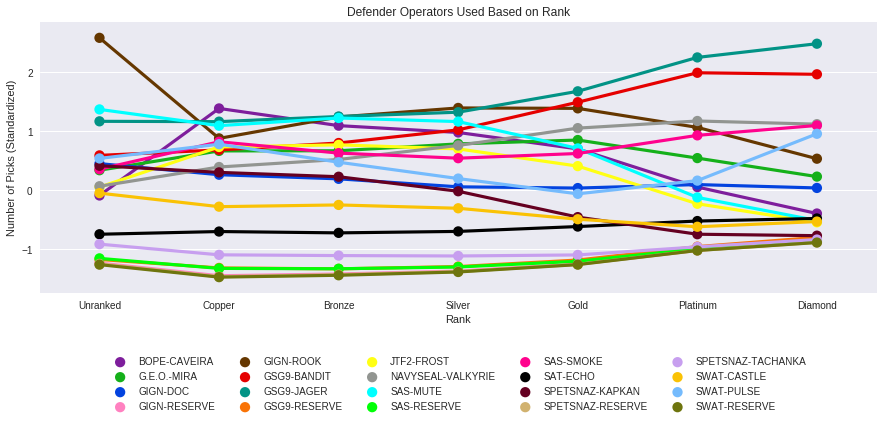

In [92]:
# Order is used to determine categorical variables for the x-axis
order = ['Unranked','Copper','Bronze','Silver','Gold','Platinum','Diamond']

# Only Defender operators
ops_by_rank_def = sd_ops_by_rank.loc[sd_ops_by_rank['role'] == ('Defender')]

# Graphing
plt.figure(figsize=(15,5))
sns.pointplot(x="skillrank", y="scaled_nbpicks", hue="operator", data=ops_by_rank_def, legend=False, palette=new_palette, size=5, aspect=2.5, order=order);
plt.legend(loc=9, bbox_to_anchor=(0.5, -0.2), ncol=5)
plt.title('Defender Operators Used Based on Rank')
plt.xlabel('Rank')
plt.ylabel('Number of Picks (Standardized)')
sns.plt.show()

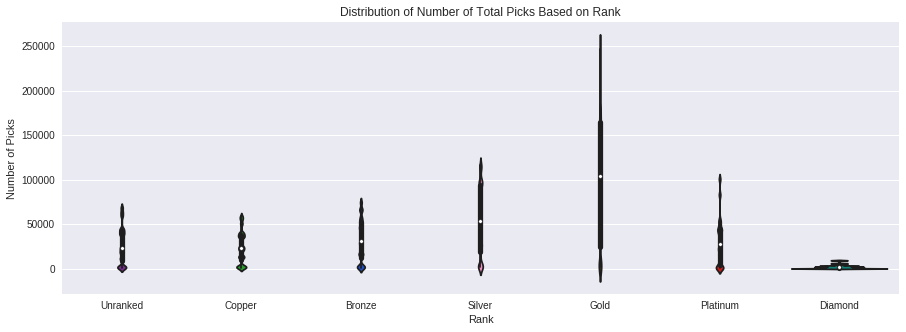

In [93]:
plt.figure(figsize=(15,5))
sns.violinplot(x="skillrank", y="nbpicks", data=ops_by_rank_att, legend=False, palette=new_palette, order=order, bw=.1)
plt.legend(loc=9, bbox_to_anchor=(0.5, -0.2), ncol=5)
plt.title('Distribution of Number of Total Picks Based on Rank')
plt.xlabel('Rank')
plt.ylabel('Number of Picks')
sns.plt.show()

In [ ]:
# Adding k/d and win ratio columns
objectives_overall['k/d_ratio'] = pd.to_numeric(objectives_overall['nbkills']) / pd.to_numeric(objectives_overall['nbdeaths'])
objectives_overall['win_ratio'] = pd.to_numeric(objectives_overall['nbwins']) / pd.to_numeric(objectives_overall['nbpicks'])
objectives_overall.head()